In [35]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from utils import calculate_income_1000_customers
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [36]:
TRAIN_SIZE = 0.8

# KNeighborsClassifier

In [37]:
np.random.seed(0)
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None).to_numpy()
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None).to_numpy().ravel()

N_ITER = 50

In [4]:
param_grid = {
    'n_neighbors': [5, 10, 15, 50],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)

In [5]:
num_features = [2, 3, 4, 5]

accuracies = {n: [] for n in num_features} 
accuracies_top = {n: [] for n in num_features} 
income = {n: [] for n in num_features} 

for i in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    print("Iteration nr: ", i)
    for n in num_features:
        selected = [100 + i for i in range(1, n+1)]

        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        y_proba = model.predict_proba(X_test[:, selected])
        
        accuracies_top[n].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
        income[n].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
        
        accuracies[n].append(accuracy_score(y_test, y_pred))

Iteration nr:  0
Iteration nr:  1
Iteration nr:  2
Iteration nr:  3
Iteration nr:  4
Iteration nr:  5
Iteration nr:  6
Iteration nr:  7
Iteration nr:  8
Iteration nr:  9
Iteration nr:  10
Iteration nr:  11
Iteration nr:  12
Iteration nr:  13
Iteration nr:  14
Iteration nr:  15
Iteration nr:  16
Iteration nr:  17
Iteration nr:  18
Iteration nr:  19
Iteration nr:  20
Iteration nr:  21
Iteration nr:  22
Iteration nr:  23
Iteration nr:  24
Iteration nr:  25
Iteration nr:  26
Iteration nr:  27
Iteration nr:  28
Iteration nr:  29
Iteration nr:  30
Iteration nr:  31
Iteration nr:  32
Iteration nr:  33
Iteration nr:  34
Iteration nr:  35
Iteration nr:  36
Iteration nr:  37
Iteration nr:  38
Iteration nr:  39
Iteration nr:  40
Iteration nr:  41
Iteration nr:  42
Iteration nr:  43
Iteration nr:  44
Iteration nr:  45
Iteration nr:  46
Iteration nr:  47
Iteration nr:  48
Iteration nr:  49


In [6]:
avg_accuracies = [np.mean(accuracies[n]) for n in num_features]
avg_accuracies_top = [np.mean(accuracies_top[n]) for n in num_features]
avg_income = [np.mean(income[n]) for n in num_features]

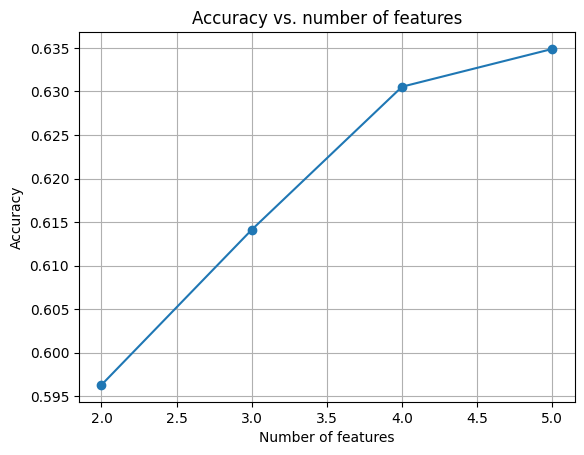

In [7]:
plt.plot(num_features, avg_accuracies, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. number of features')
plt.grid(True)
plt.show()

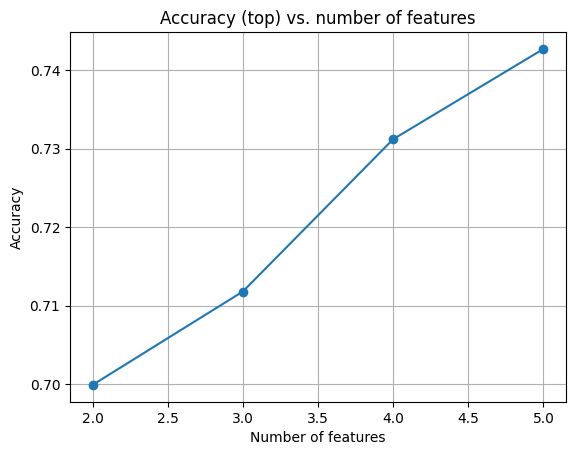

In [8]:
plt.plot(num_features, avg_accuracies_top, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy (top) vs. number of features')
plt.grid(True)
plt.show()

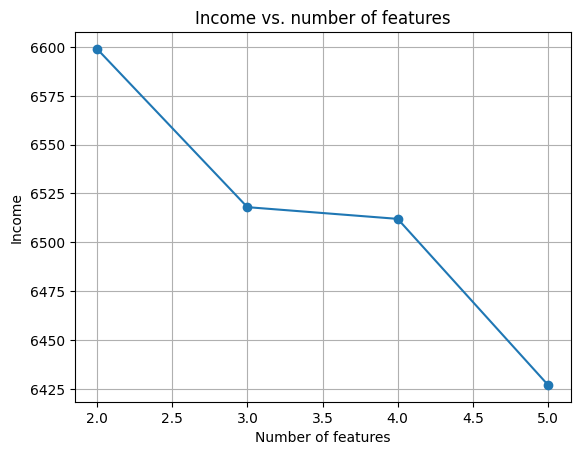

In [9]:
plt.plot(num_features, avg_income, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Income')
plt.title('Income vs. number of features')
plt.grid(True)
plt.show()

In [10]:
print(max(avg_income))

6599.0


## Grid parameters for best num features

#### 3 features - [101, 102, 103]

In [11]:
np.random.seed(0)
N_ITER = 1

In [12]:
param_grid = {
    'n_neighbors': [5, 10, 15, 50, 80, 100, 120, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 10, 20, 30, 40, 50],
    'p': [1, 2]
}
model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [13]:
accuracies = []
accuracies_top = []
income = []
for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102, 103]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [14]:
p = model.best_params_
p

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'chebyshev',
 'n_neighbors': 120,
 'p': 1,
 'weights': 'distance'}

In [15]:
np.random.seed(0)
N_ITER = 1000

In [16]:
model = KNeighborsClassifier(leaf_size=p['leaf_size'], metric=p['metric'], n_neighbors=p['n_neighbors'], p=p['p'], weights=p['weights'])
accuracies = []
accuracies_top = []
income = []
for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102, 103]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [17]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [18]:
print(avg_income)

[6666.95]


#### 3 features - [102, 103, 105]

In [41]:
np.random.seed(0)
N_ITER = 1

In [42]:
param_grid = {
    'n_neighbors': [5, 10, 15, 50, 80, 100, 120, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 10, 20, 30, 40, 50],
    'p': [1, 2]
}
model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [43]:
accuracies = []
accuracies_top = []
income = []
selected = [102, 103, 105]

for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [44]:
p = model.best_params_
p

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'chebyshev',
 'n_neighbors': 150,
 'p': 1,
 'weights': 'distance'}

In [49]:
np.random.seed(0)
N_ITER = 1000

In [50]:
model = KNeighborsClassifier(leaf_size=p['leaf_size'], metric=p['metric'], n_neighbors=p['n_neighbors'], p=p['p'], weights=p['weights'])
accuracies = []
accuracies_top = []
income = []
selected = [102, 103, 105]
for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [51]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [52]:
print(avg_income)

[6732.5]


### 2 features

In [27]:
np.random.seed(0)
N_ITER = 1

In [28]:
param_grid = {
    'n_neighbors': [5, 10, 15, 50, 80, 100, 120, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 10, 20, 30, 40, 50],
    'p': [1, 2]
}
model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [29]:
accuracies = []
accuracies_top = []
income = []
for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [30]:
p = model.best_params_
p

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'euclidean',
 'n_neighbors': 120,
 'p': 1,
 'weights': 'uniform'}

In [31]:
np.random.seed(0)
N_ITER = 1000

In [32]:
model = KNeighborsClassifier(leaf_size=p['leaf_size'], metric=p['metric'], n_neighbors=p['n_neighbors'], p=p['p'], weights=p['weights'])

accuracies = []
accuracies_top = []
income = []
for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [33]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [34]:
print(avg_income)

[6543.9]
